# In this tutorial we'll see what to watch for during and after the network training

## Monitoring training health

First let's look at at the training history - we want to display the training set loss and vlidation set loss as a function of 'iteration' or the batch number seen by our model

In [1]:
import os,sys
currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
from utils import plot_utils

In [3]:
%matplotlib inline

You will need to change the location of where these files are

In [4]:
loc="../model_state_dumps/20190823_171417"

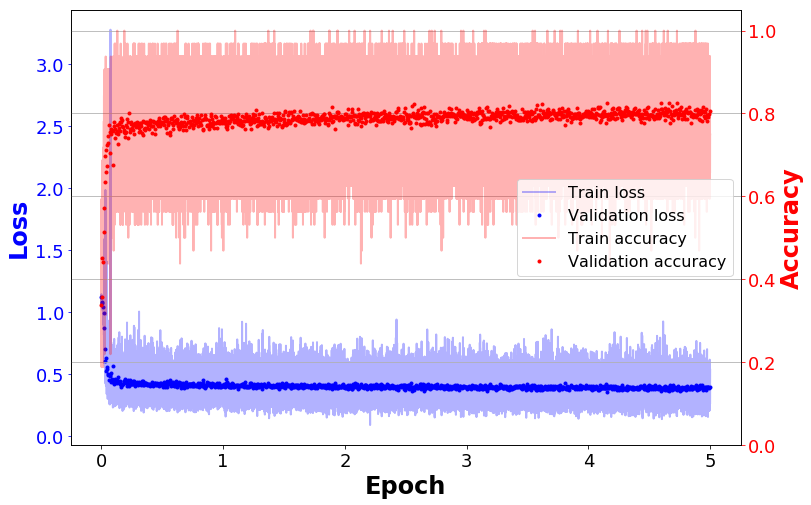

In [5]:
plot_utils.disp_learn_hist(loc)


Why so bumpy?
   - there is 'noise' associated with batch-to-batch variation BUT
   - The main effect is actually the real bumpiness in the loss landscape being traversed during learning
   
To learn anything we need to smooth out the plot - for instance by using moving average

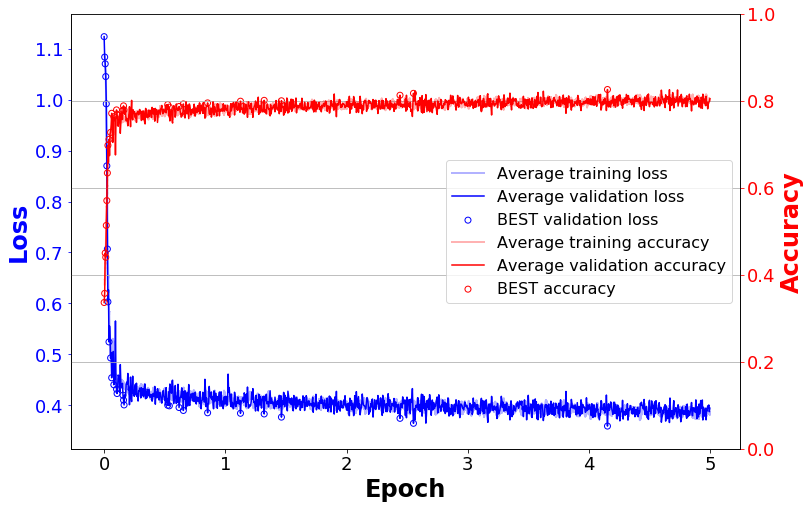

In [6]:
plot_utils.disp_learn_hist_smoothed(loc,window_train=200,window_val=1)

This actually looks pretty good - we get initially a very quick learning and then a plateau. Both training and validation loss is still decreasing slightly and tracking - which means we could probably kept on training

Let's run training on a small sample to illustrate overtraining

In [7]:
from models.simpleCNN import SimpleCNN
model_CNN=SimpleCNN(num_input_channels=38,num_classes=3)

In [8]:
from utils.data_handling import WCH5Dataset

In [9]:
import numpy as np
def rotate_chan(x):
    return np.transpose(x,(2,0,1))

In [10]:
dset=WCH5Dataset("/fast_scratch/TRISEP_data/NUPRISM.h5",reduced_dataset_size=10000,val_split=0.1,test_split=0.1,transform=rotate_chan)

Reduced size: 10000


In [11]:
class CONFIG:
    pass
config=CONFIG()
config.batch_size_test = 1024
config.batch_size_train = 32
config.batch_size_val = 512
config.lr=0.01
config.device = 'gpu'
config.gpu_list = [0]
config.dump_path = '../model_state_dumps'
config.num_workers_train=3
config.num_workers_val=2
config.num_workers_test=2

In [12]:
from utils.engine import Engine

In [13]:
engine=Engine(model_CNN,dset,config)

Requesting a GPU
CUDA is available
Creating a directory for run dump: ../model_state_dumps/20190823_193641/


In [14]:
engine.train(epochs=20,report_interval=10,valid_interval=10)

Epoch 0 Starting @ 2019-08-23 19:36:41
... Iteration 0 ... Epoch 0.00 ... Validation Loss 1.106 ... Validation Accuracy 0.311
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
best validation loss so far!: 1.1059662103652954
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNNBEST.pth
... Iteration 1 ... Epoch 0.00 ... Loss 1.112 ... Accuracy 0.281
... Iteration 10 ... Epoch 0.04 ... Validation Loss 1.085 ... Validation Accuracy 0.344
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
best validation loss so far!: 1.0846896171569824
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNNBEST.pth
... Iteration 11 ... Epoch 0.04 ... Loss 1.097 ... Accuracy 0.250
starting over on the validation set
... Iteration 20 ... Epoch 0.08 ... Validation Loss 1.085 ... Validation Accuracy 0.426
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 21 ... Epoch 0.08 ... Loss 1.080 ... Accuracy 0.469

starting over on the validation set
... Iteration 280 ... Epoch 1.12 ... Validation Loss 0.470 ... Validation Accuracy 0.697
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
best validation loss so far!: 0.4698519706726074
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNNBEST.pth
... Iteration 281 ... Epoch 1.12 ... Loss 0.603 ... Accuracy 0.594
... Iteration 290 ... Epoch 1.16 ... Validation Loss 0.529 ... Validation Accuracy 0.711
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 291 ... Epoch 1.16 ... Loss 0.492 ... Accuracy 0.812
starting over on the validation set
... Iteration 300 ... Epoch 1.20 ... Validation Loss 0.483 ... Validation Accuracy 0.738
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 301 ... Epoch 1.20 ... Loss 0.518 ... Accuracy 0.656
... Iteration 310 ... Epoch 1.24 ... Validation Loss 0.616 ... Validation Accuracy 0.674
Saved checkpoint as: ../model_

starting over on the validation set
... Iteration 600 ... Epoch 2.40 ... Validation Loss 0.480 ... Validation Accuracy 0.717
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 601 ... Epoch 2.40 ... Loss 0.448 ... Accuracy 0.750
... Iteration 610 ... Epoch 2.44 ... Validation Loss 0.432 ... Validation Accuracy 0.785
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 611 ... Epoch 2.44 ... Loss 0.371 ... Accuracy 0.938
starting over on the validation set
... Iteration 620 ... Epoch 2.48 ... Validation Loss 0.441 ... Validation Accuracy 0.756
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 621 ... Epoch 2.48 ... Loss 0.477 ... Accuracy 0.812
... Iteration 630 ... Epoch 2.52 ... Validation Loss 0.435 ... Validation Accuracy 0.756
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 631 ... Epoch 2.52 ... Loss 0.440 ... Accuracy 0.812
starting over on

starting over on the validation set
... Iteration 940 ... Epoch 3.76 ... Validation Loss 0.434 ... Validation Accuracy 0.758
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 941 ... Epoch 3.76 ... Loss 0.406 ... Accuracy 0.812
... Iteration 950 ... Epoch 3.80 ... Validation Loss 0.423 ... Validation Accuracy 0.777
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 951 ... Epoch 3.80 ... Loss 0.313 ... Accuracy 0.938
starting over on the validation set
... Iteration 960 ... Epoch 3.84 ... Validation Loss 0.441 ... Validation Accuracy 0.775
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 961 ... Epoch 3.84 ... Loss 0.384 ... Accuracy 0.812
... Iteration 970 ... Epoch 3.88 ... Validation Loss 0.477 ... Validation Accuracy 0.742
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 971 ... Epoch 3.88 ... Loss 0.427 ... Accuracy 0.812
starting over on

... Iteration 1260 ... Epoch 5.04 ... Validation Loss 0.438 ... Validation Accuracy 0.740
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 1261 ... Epoch 5.04 ... Loss 0.418 ... Accuracy 0.781
... Iteration 1270 ... Epoch 5.08 ... Validation Loss 0.544 ... Validation Accuracy 0.699
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 1271 ... Epoch 5.08 ... Loss 0.264 ... Accuracy 0.875
starting over on the validation set
... Iteration 1280 ... Epoch 5.12 ... Validation Loss 0.430 ... Validation Accuracy 0.777
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 1281 ... Epoch 5.12 ... Loss 0.458 ... Accuracy 0.781
... Iteration 1290 ... Epoch 5.16 ... Validation Loss 0.445 ... Validation Accuracy 0.754
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 1291 ... Epoch 5.16 ... Loss 0.461 ... Accuracy 0.688
starting over on the validation set
... Iter

starting over on the validation set
... Iteration 1600 ... Epoch 6.40 ... Validation Loss 0.448 ... Validation Accuracy 0.752
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 1601 ... Epoch 6.40 ... Loss 0.296 ... Accuracy 0.906
... Iteration 1610 ... Epoch 6.44 ... Validation Loss 0.420 ... Validation Accuracy 0.770
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 1611 ... Epoch 6.44 ... Loss 0.288 ... Accuracy 0.875
starting over on the validation set
... Iteration 1620 ... Epoch 6.48 ... Validation Loss 0.427 ... Validation Accuracy 0.785
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 1621 ... Epoch 6.48 ... Loss 0.364 ... Accuracy 0.812
... Iteration 1630 ... Epoch 6.52 ... Validation Loss 0.435 ... Validation Accuracy 0.762
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 1631 ... Epoch 6.52 ... Loss 0.441 ... Accuracy 0.781
starting

starting over on the validation set
... Iteration 1940 ... Epoch 7.76 ... Validation Loss 0.418 ... Validation Accuracy 0.775
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 1941 ... Epoch 7.76 ... Loss 0.512 ... Accuracy 0.750
... Iteration 1950 ... Epoch 7.80 ... Validation Loss 0.453 ... Validation Accuracy 0.725
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 1951 ... Epoch 7.80 ... Loss 0.375 ... Accuracy 0.719
starting over on the validation set
... Iteration 1960 ... Epoch 7.84 ... Validation Loss 0.387 ... Validation Accuracy 0.797
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
best validation loss so far!: 0.38714471459388733
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNNBEST.pth
... Iteration 1961 ... Epoch 7.84 ... Loss 0.320 ... Accuracy 0.812
... Iteration 1970 ... Epoch 7.88 ... Validation Loss 0.482 ... Validation Accuracy 0.736
Saved checkpoint as: .

... Iteration 2260 ... Epoch 9.04 ... Validation Loss 0.439 ... Validation Accuracy 0.760
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 2261 ... Epoch 9.04 ... Loss 0.386 ... Accuracy 0.812
... Iteration 2270 ... Epoch 9.08 ... Validation Loss 0.427 ... Validation Accuracy 0.766
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 2271 ... Epoch 9.08 ... Loss 0.455 ... Accuracy 0.656
starting over on the validation set
... Iteration 2280 ... Epoch 9.12 ... Validation Loss 0.407 ... Validation Accuracy 0.760
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 2281 ... Epoch 9.12 ... Loss 0.374 ... Accuracy 0.750
... Iteration 2290 ... Epoch 9.16 ... Validation Loss 0.452 ... Validation Accuracy 0.764
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 2291 ... Epoch 9.16 ... Loss 0.326 ... Accuracy 0.844
starting over on the validation set
... Iter

starting over on the validation set
... Iteration 2600 ... Epoch 10.40 ... Validation Loss 0.459 ... Validation Accuracy 0.760
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 2601 ... Epoch 10.40 ... Loss 0.436 ... Accuracy 0.875
... Iteration 2610 ... Epoch 10.44 ... Validation Loss 0.456 ... Validation Accuracy 0.766
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 2611 ... Epoch 10.44 ... Loss 0.371 ... Accuracy 0.781
starting over on the validation set
... Iteration 2620 ... Epoch 10.48 ... Validation Loss 0.450 ... Validation Accuracy 0.764
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 2621 ... Epoch 10.48 ... Loss 0.381 ... Accuracy 0.812
... Iteration 2630 ... Epoch 10.52 ... Validation Loss 0.438 ... Validation Accuracy 0.762
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 2631 ... Epoch 10.52 ... Loss 0.509 ... Accuracy 0.594


starting over on the validation set
... Iteration 2940 ... Epoch 11.76 ... Validation Loss 0.419 ... Validation Accuracy 0.762
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 2941 ... Epoch 11.76 ... Loss 0.260 ... Accuracy 0.875
... Iteration 2950 ... Epoch 11.80 ... Validation Loss 0.486 ... Validation Accuracy 0.744
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 2951 ... Epoch 11.80 ... Loss 0.458 ... Accuracy 0.719
starting over on the validation set
... Iteration 2960 ... Epoch 11.84 ... Validation Loss 0.424 ... Validation Accuracy 0.785
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 2961 ... Epoch 11.84 ... Loss 0.506 ... Accuracy 0.719
... Iteration 2970 ... Epoch 11.88 ... Validation Loss 0.457 ... Validation Accuracy 0.734
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 2971 ... Epoch 11.88 ... Loss 0.348 ... Accuracy 0.812


starting over on the validation set
... Iteration 3280 ... Epoch 13.12 ... Validation Loss 0.467 ... Validation Accuracy 0.756
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 3281 ... Epoch 13.12 ... Loss 0.283 ... Accuracy 0.906
... Iteration 3290 ... Epoch 13.16 ... Validation Loss 0.504 ... Validation Accuracy 0.740
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 3291 ... Epoch 13.16 ... Loss 0.181 ... Accuracy 0.969
starting over on the validation set
... Iteration 3300 ... Epoch 13.20 ... Validation Loss 0.471 ... Validation Accuracy 0.752
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 3301 ... Epoch 13.20 ... Loss 0.412 ... Accuracy 0.812
... Iteration 3310 ... Epoch 13.24 ... Validation Loss 0.490 ... Validation Accuracy 0.756
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 3311 ... Epoch 13.24 ... Loss 0.344 ... Accuracy 0.875


starting over on the validation set
... Iteration 3620 ... Epoch 14.48 ... Validation Loss 0.471 ... Validation Accuracy 0.762
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 3621 ... Epoch 14.48 ... Loss 0.431 ... Accuracy 0.719
... Iteration 3630 ... Epoch 14.52 ... Validation Loss 0.505 ... Validation Accuracy 0.736
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 3631 ... Epoch 14.52 ... Loss 0.158 ... Accuracy 1.000
starting over on the validation set
... Iteration 3640 ... Epoch 14.56 ... Validation Loss 0.464 ... Validation Accuracy 0.771
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 3641 ... Epoch 14.56 ... Loss 0.297 ... Accuracy 0.844
... Iteration 3650 ... Epoch 14.60 ... Validation Loss 0.502 ... Validation Accuracy 0.742
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 3651 ... Epoch 14.60 ... Loss 0.245 ... Accuracy 0.906


starting over on the validation set
... Iteration 3960 ... Epoch 15.84 ... Validation Loss 0.539 ... Validation Accuracy 0.766
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 3961 ... Epoch 15.84 ... Loss 0.396 ... Accuracy 0.750
... Iteration 3970 ... Epoch 15.88 ... Validation Loss 0.528 ... Validation Accuracy 0.717
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 3971 ... Epoch 15.88 ... Loss 0.481 ... Accuracy 0.719
starting over on the validation set
... Iteration 3980 ... Epoch 15.92 ... Validation Loss 0.520 ... Validation Accuracy 0.729
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 3981 ... Epoch 15.92 ... Loss 0.490 ... Accuracy 0.750
... Iteration 3990 ... Epoch 15.96 ... Validation Loss 0.527 ... Validation Accuracy 0.721
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 3991 ... Epoch 15.96 ... Loss 0.426 ... Accuracy 0.812


starting over on the validation set
... Iteration 4300 ... Epoch 17.20 ... Validation Loss 0.603 ... Validation Accuracy 0.736
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 4301 ... Epoch 17.20 ... Loss 0.200 ... Accuracy 0.938
... Iteration 4310 ... Epoch 17.24 ... Validation Loss 0.560 ... Validation Accuracy 0.750
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 4311 ... Epoch 17.24 ... Loss 0.166 ... Accuracy 0.938
starting over on the validation set
... Iteration 4320 ... Epoch 17.28 ... Validation Loss 0.594 ... Validation Accuracy 0.727
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 4321 ... Epoch 17.28 ... Loss 0.461 ... Accuracy 0.781
... Iteration 4330 ... Epoch 17.32 ... Validation Loss 0.548 ... Validation Accuracy 0.730
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 4331 ... Epoch 17.32 ... Loss 0.314 ... Accuracy 0.875


starting over on the validation set
... Iteration 4640 ... Epoch 18.56 ... Validation Loss 0.571 ... Validation Accuracy 0.734
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 4641 ... Epoch 18.56 ... Loss 0.149 ... Accuracy 0.969
... Iteration 4650 ... Epoch 18.60 ... Validation Loss 0.587 ... Validation Accuracy 0.748
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 4651 ... Epoch 18.60 ... Loss 0.195 ... Accuracy 0.938
starting over on the validation set
... Iteration 4660 ... Epoch 18.64 ... Validation Loss 0.663 ... Validation Accuracy 0.729
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 4661 ... Epoch 18.64 ... Loss 0.516 ... Accuracy 0.781
... Iteration 4670 ... Epoch 18.68 ... Validation Loss 0.736 ... Validation Accuracy 0.695
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 4671 ... Epoch 18.68 ... Loss 0.196 ... Accuracy 0.844


starting over on the validation set
... Iteration 4980 ... Epoch 19.92 ... Validation Loss 0.732 ... Validation Accuracy 0.727
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 4981 ... Epoch 19.92 ... Loss 0.127 ... Accuracy 0.906
... Iteration 4990 ... Epoch 19.96 ... Validation Loss 0.703 ... Validation Accuracy 0.715
Saved checkpoint as: ../model_state_dumps/20190823_193641/SimpleCNN.pth
... Iteration 4991 ... Epoch 19.96 ... Loss 0.291 ... Accuracy 0.844


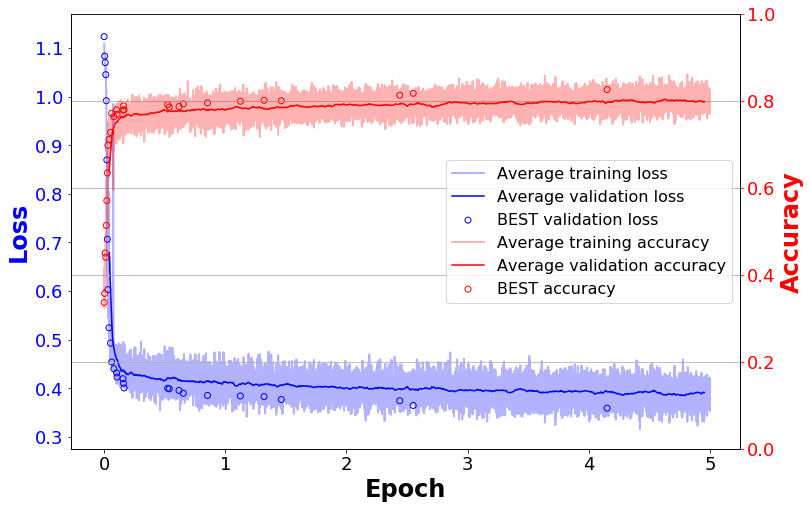

In [15]:
loc="../model_state_dumps/20190823_171417"
plot_utils.disp_learn_hist_smoothed(loc,window_train=20,window_val=20)

Now this clearly shows overtraining - validation loss starts to climb. Possibly other pathologies

## Evaluating model performance in classification task

Now let's go back to the full dataset and load the model trained last time on the full dataset

In [16]:
dset=WCH5Dataset("/fast_scratch/TRISEP_data/NUPRISM.h5",val_split=0.1,test_split=0.1,transform=rotate_chan)

In [17]:
!ls ../model_state_dumps/20190823_072324

ls: cannot access '../model_state_dumps/20190823_072324': No such file or directory


In [18]:
engine=Engine(model_CNN,dset,config)

Requesting a GPU
CUDA is available
Creating a directory for run dump: ../model_state_dumps/20190823_193902/


In [19]:
engine.restore_state("../model_state_dumps/20190823_171417/SimpleCNNBEST.pth")

Restoring state from ../model_state_dumps/20190823_171417/SimpleCNNBEST.pth
Restoration complete.


In [20]:
engine.dirpath="../model_state_dumps/20190823_171417"

In [21]:
engine.validate()

val_iterations : 0
val_iterations : 1
val_iterations : 2
val_iterations : 3
val_iterations : 4
val_iterations : 5
val_iterations : 6
val_iterations : 7
val_iterations : 8
val_iterations : 9
val_iterations : 10
val_iterations : 11
val_iterations : 12
val_iterations : 13
val_iterations : 14
val_iterations : 15
val_iterations : 16
val_iterations : 17
val_iterations : 18
val_iterations : 19
val_iterations : 20
val_iterations : 21
val_iterations : 22
val_iterations : 23
val_iterations : 24
val_iterations : 25
val_iterations : 26
val_iterations : 27
val_iterations : 28
val_iterations : 29
val_iterations : 30
val_iterations : 31
val_iterations : 32
val_iterations : 33
val_iterations : 34
val_iterations : 35
val_iterations : 36
val_iterations : 37
val_iterations : 38
val_iterations : 39
val_iterations : 40
val_iterations : 41
val_iterations : 42
val_iterations : 43
val_iterations : 44
val_iterations : 45
val_iterations : 46
val_iterations : 47
val_iterations : 48
val_iterations : 49
val_iterat

### Examination of classifier output

Plot the classifier softmax output for various classes and outputs

In [22]:
labels_val=np.load(engine.dirpath + "labels.npy")
predictions_val=np.load(engine.dirpath + "predictions.npy")
softmax_out_val=np.load(engine.dirpath + "softmax.npy")

In [23]:
from matplotlib import pyplot as plt
def plot_resp(labels,softmax_out):
    fig1, ax1 = plt.subplots(figsize=(12,8),facecolor="w")
    ax1.tick_params(axis="both", labelsize=20)
    softmax_out_val_gamma_Pe=softmax_out_val[labels_val==0][:,1]
    softmax_out_val_e_Pe=softmax_out_val[labels_val==1][:,1]
    
    bins=np.linspace(0.0,1.0,51)
    values, bins, patches = ax1.hist(softmax_out_val_gamma_Pe, bins=bins, 
                                    label= 'gamma', color='blue', density=True,
                                    alpha=0.3)
    
    values, bins, patches = ax1.hist(softmax_out_val_e_Pe, bins=bins, 
                                    label= 'electron', color='red', density=True,
                                    alpha=0.3)
    ax1.legend(prop={'size': 16})
    ax1.set_xlabel('$P(e)$',fontweight='bold',fontsize=24,color='black')
    
    fig2, ax2 = plt.subplots(figsize=(12,8),facecolor="w")
    ax2.tick_params(axis="both", labelsize=20)
    softmax_out_val_e_Pmu=softmax_out_val[labels_val==1][:,2]
    softmax_out_val_mu_Pmu=softmax_out_val[labels_val==2][:,2]
    
    values, bins, patches = ax2.hist(softmax_out_val_mu_Pmu, bins=bins, 
                                    label= 'muon', color='green', density=True,
                                    alpha=0.3)
    
    values, bins, patches = ax2.hist(softmax_out_val_e_Pmu, bins=bins, 
                                    label= 'electron', color='red', density=True,
                                    alpha=0.3, log=True)
    ax2.legend(prop={'size': 16})
    ax2.set_xlabel('$P(\mu)$',fontweight='bold',fontsize=24,color='black')
    
    
    
    plt.show()

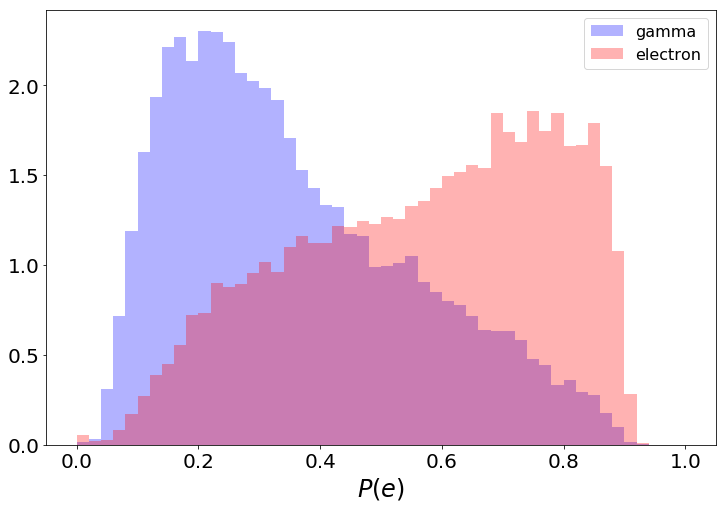

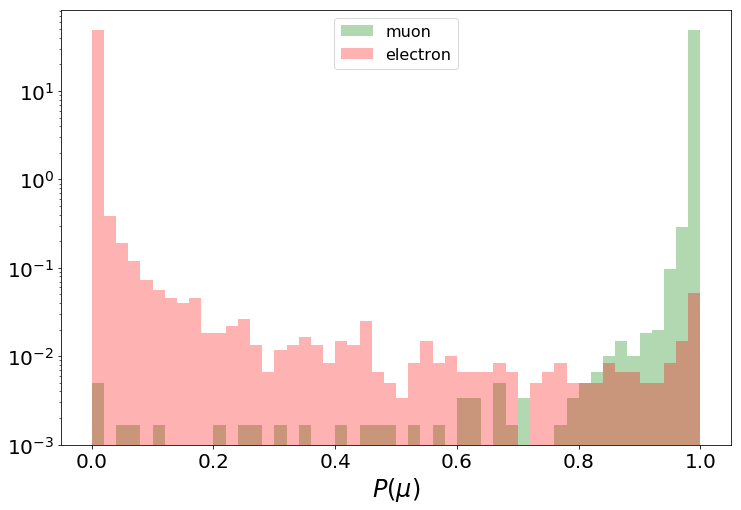

In [24]:
plot_resp(labels_val,softmax_out_val)

### The confusion matrix

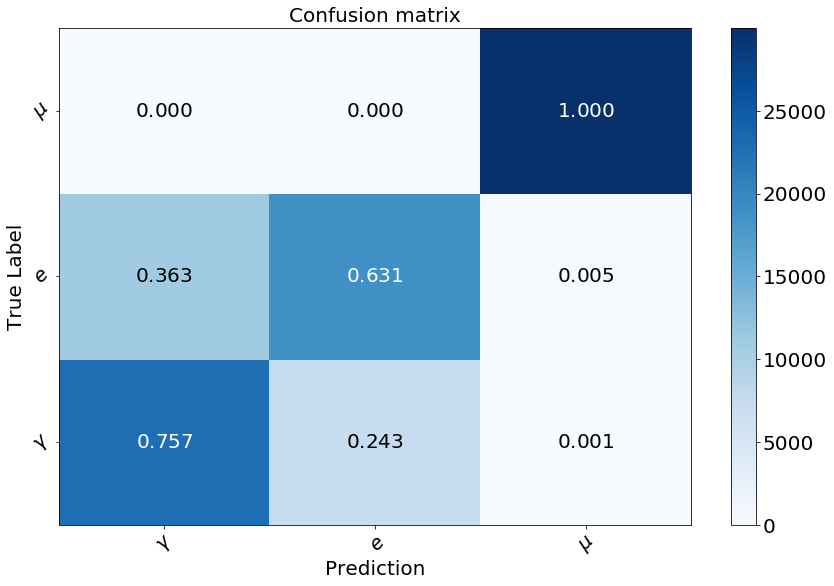

In [25]:
plot_utils.plot_confusion_matrix(labels_val, predictions_val, ['$\gamma$','$e$','$\mu$'])

### Receiver Operating Characteristic
   - We will plot ROC treating electrons as 'signal' and photons as 'background', but we have also muons - which is also a signal, so we have more reasonable possibilities of plotting ROC curves - can you name advantages and disadvantages?

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide
/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


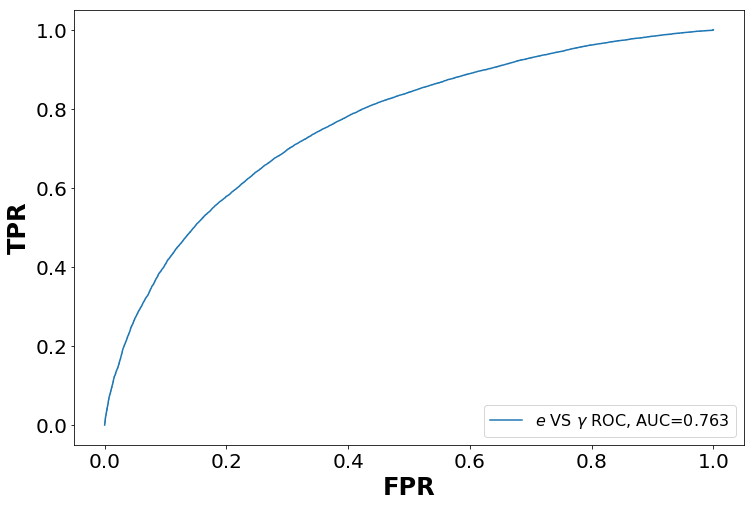

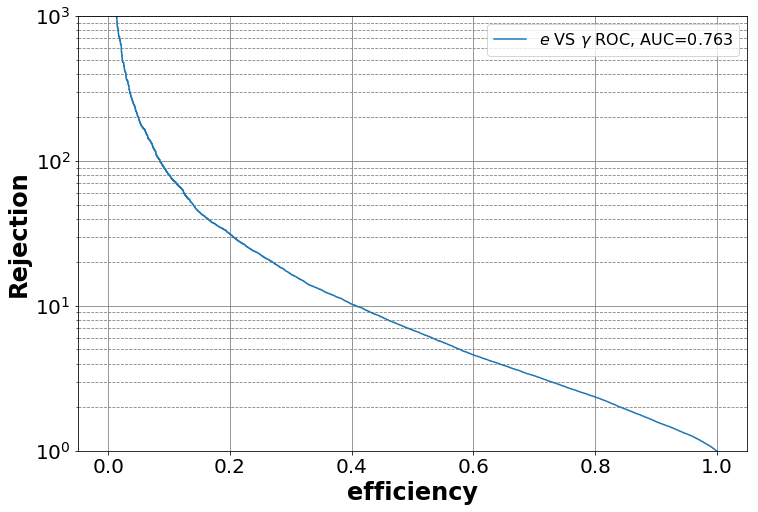

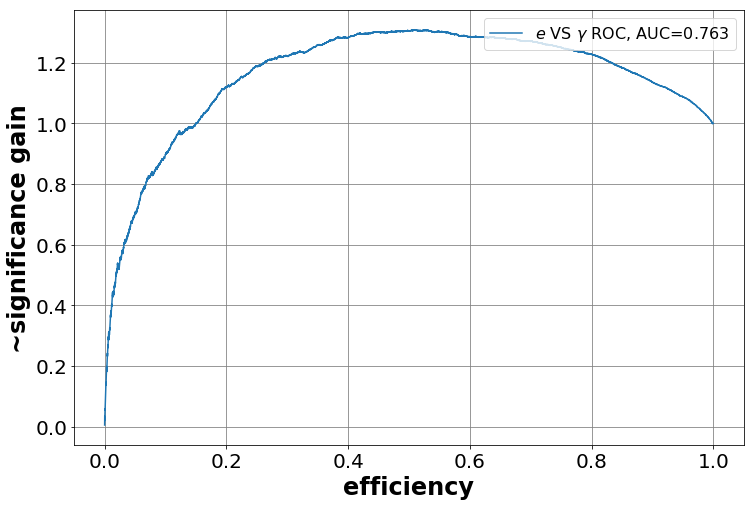

In [26]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
labels_val_e_gamma=labels_val[np.where( (labels_val==0) | (labels_val==1))]
softmax_out_val_e_gamma=softmax_out_val[np.where( (labels_val==0) | (labels_val==1))][:,1]
fpr,tpr,thr=roc_curve(labels_val_e_gamma,softmax_out_val_e_gamma)
roc_AUC=auc(fpr,tpr)
fig1, ax1 = plt.subplots(figsize=(12,8),facecolor="w")
ax1.tick_params(axis="both", labelsize=20)
ax1.plot(fpr,tpr,label=r'$e$ VS $\gamma$ ROC, AUC={:.3f}'.format(roc_AUC))
ax1.set_xlabel('FPR',fontweight='bold',fontsize=24,color='black')
ax1.set_ylabel('TPR',fontweight='bold',fontsize=24,color='black')
ax1.legend(loc="lower right",prop={'size': 16})

rejection=1.0/(fpr+1e-10)

fig2, ax2 = plt.subplots(figsize=(12,8),facecolor="w")
ax2.tick_params(axis="both", labelsize=20)
plt.yscale('log')
plt.ylim(1.0,1.0e3)
plt.grid(b=True, which='major', color='gray', linestyle='-')
plt.grid(b=True, which='minor', color='gray', linestyle='--')
ax2.plot(tpr, rejection, label=r'$e$ VS $\gamma$ ROC, AUC={:.3f}'.format(roc_AUC))
ax2.set_xlabel('efficiency',fontweight='bold',fontsize=24,color='black')
ax2.set_ylabel('Rejection',fontweight='bold',fontsize=24,color='black')
ax2.legend(loc="upper right",prop={'size': 16})

fig2, ax2 = plt.subplots(figsize=(12,8),facecolor="w")
ax2.tick_params(axis="both", labelsize=20)
#plt.yscale('log')
#plt.ylim(1.0,1)
plt.grid(b=True, which='major', color='gray', linestyle='-')
plt.grid(b=True, which='minor', color='gray', linestyle='--')
ax2.plot(tpr, tpr/np.sqrt(fpr), label=r'$e$ VS $\gamma$ ROC, AUC={:.3f}'.format(roc_AUC))
ax2.set_xlabel('efficiency',fontweight='bold',fontsize=24,color='black')
ax2.set_ylabel('~significance gain',fontweight='bold',fontsize=24,color='black')
ax2.legend(loc="upper right",prop={'size': 16})

plt.show()
